In [ ]:
# dimensionality reduction and unsupervised clustering for EELS-SI
# Jinseok Ryu (jinseuk56@gmail.com)
# https://doi.org/10.1016/j.ultramic.2021.113314

In [2]:
from drca import DR_assisted_CA
import tkinter.filedialog as tkf
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Cambria'

In [3]:
file_adr = []

In [4]:
# repeat this block to add other files
file_adr.extend(tkf.askopenfilenames())

In [ ]:
%matplotlib inline

In [5]:
# dat_dim: dimensions of hyperspectral data
# rescale: if True, each hyperspectral data will be divided by its maximum value
run_4DSTEM = DR_assisted_CA(file_adr, dat_dim=4, dat_unit='1/nm', rescale=False)

(128, 128, 128, 128)


[[63.0, 64.0]]


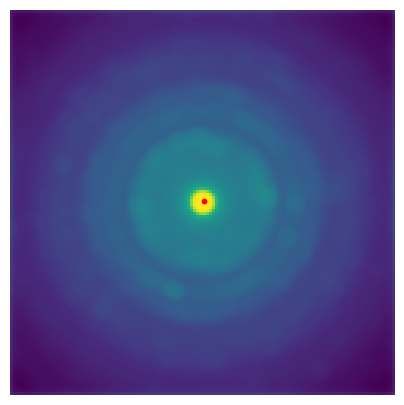

In [12]:
# find (and remove) the center of diffraction patterns
# cbox_edge: the edge length of the center box for finding the center position
# center_remove: if not zero, the center box specified by center_remove of each diffration pattern will be removed
# log_scale: if True, the intensities of each diffraction pattern will be converted into log-scale
run_4DSTEM.find_center(cbox_edge=7, center_remove=0, result_visual=True, log_scale=True)

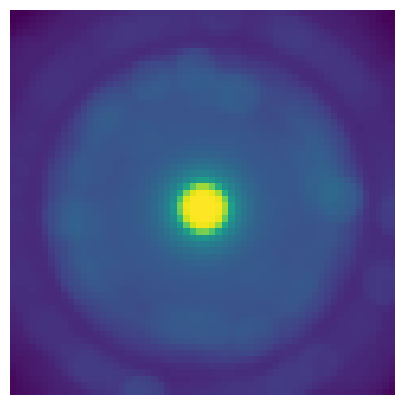

(128, 128, 3600)
(16384, 3600)
7.41843 16.351442
0.4710196 1.0
0.4710196 1.0


In [13]:
# prepare the input dataset (two options for flattening diffraction patterns)
# radial_flat: if False, the center box specified by w_size will be flattened (2D -> 1D)
run_4DSTEM.make_input(min_val=0.0, max_normalize=True, 
           log_scale=True, radial_flat=False, 
           w_size=30, radial_range=None)

Epoch 10 reached after 0.572 seconds, error: 379.568443
Epoch 20 reached after 1.022 seconds, error: 307.082694
Epoch 30 reached after 1.470 seconds, error: 274.798420
Epoch 40 reached after 1.915 seconds, error: 258.023088
Epoch 50 reached after 2.359 seconds, error: 248.459692
Epoch 60 reached after 2.798 seconds, error: 242.596630
Epoch 70 reached after 3.235 seconds, error: 238.753469
Epoch 80 reached after 3.683 seconds, error: 236.084433
Epoch 90 reached after 4.145 seconds, error: 234.149074
Epoch 100 reached after 4.579 seconds, error: 232.701475
Epoch 110 reached after 5.043 seconds, error: 231.588131
Epoch 120 reached after 5.513 seconds, error: 230.701122
Epoch 130 reached after 5.995 seconds, error: 229.964187
Epoch 140 reached after 6.460 seconds, error: 229.327269
Epoch 150 reached after 6.908 seconds, error: 228.759947


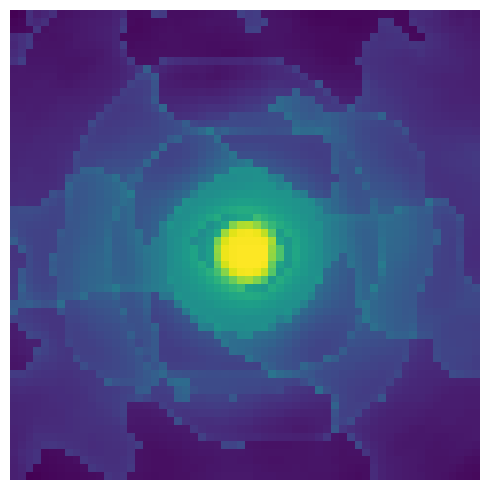

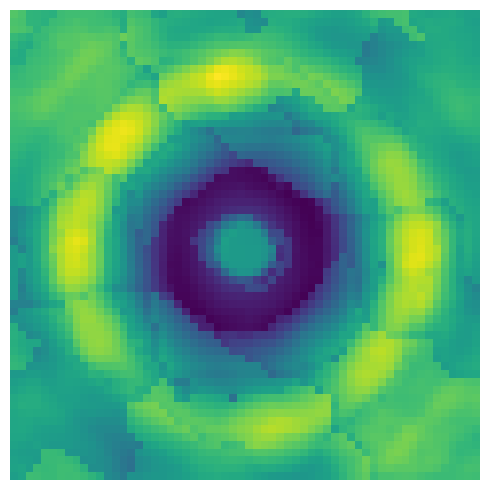

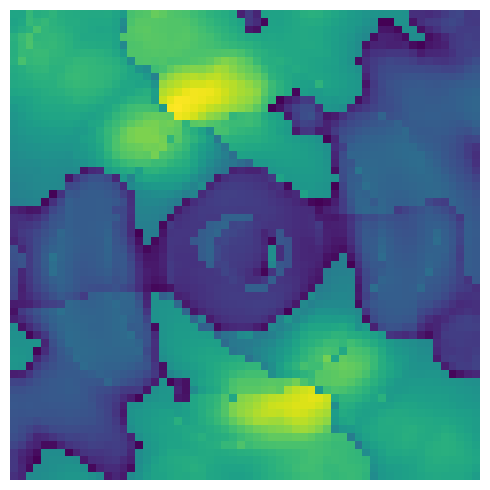

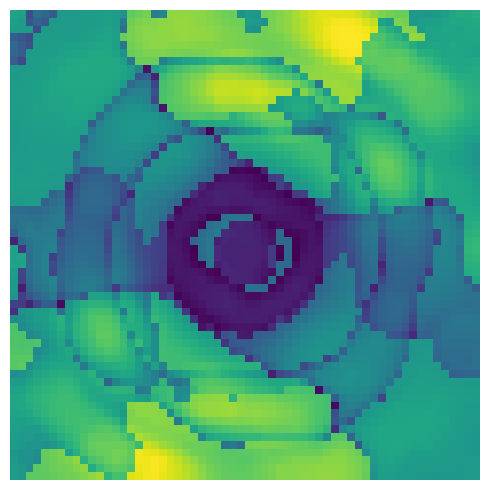

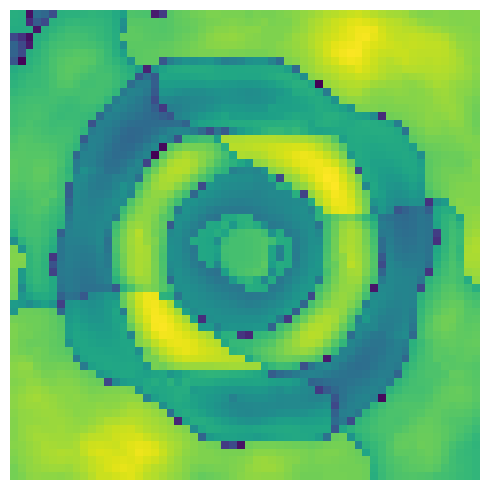

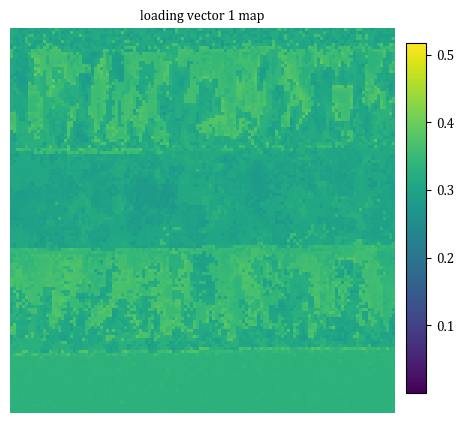

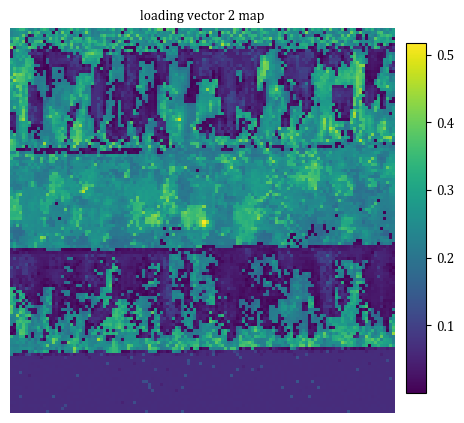

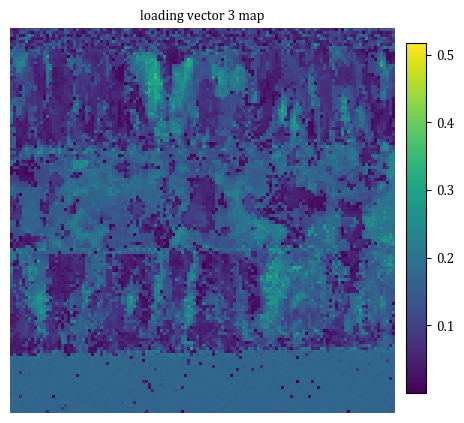

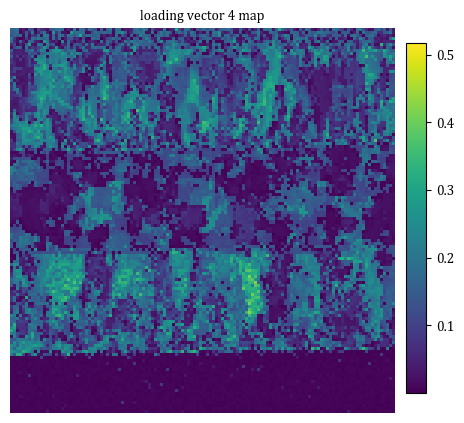

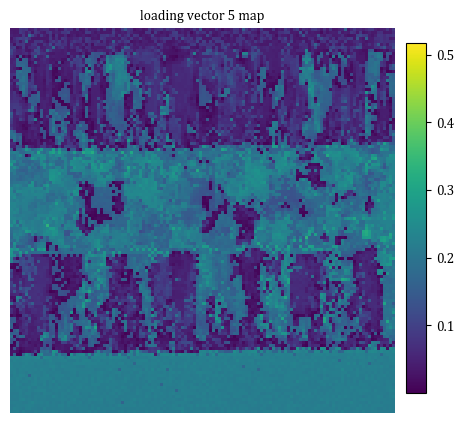

In [14]:
# first decomposition (three options: NMF, PCA, CAE)
run_4DSTEM.ini_DR(method="nmf", num_comp=5, result_visual=True)

1 perplexity 50.0 finished
0.84 min have passed


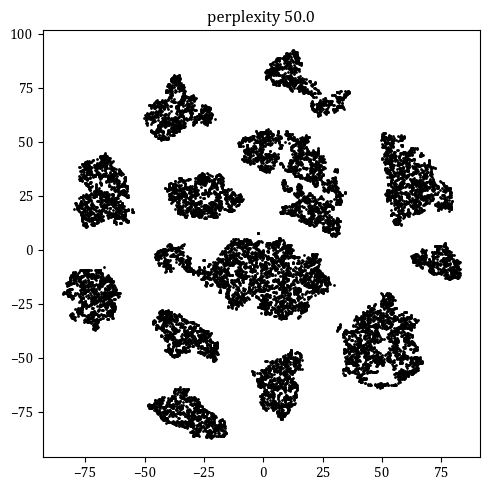

In [15]:
# second decomposition (t-SNE)
run_4DSTEM.aug_DR(num_comp=2, method="tsne", perplex=[50])

(16384, 2)


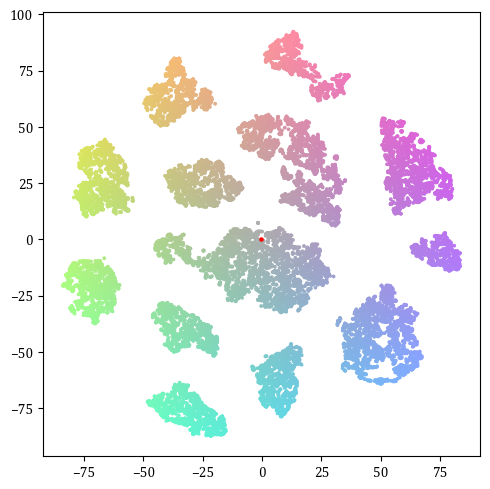

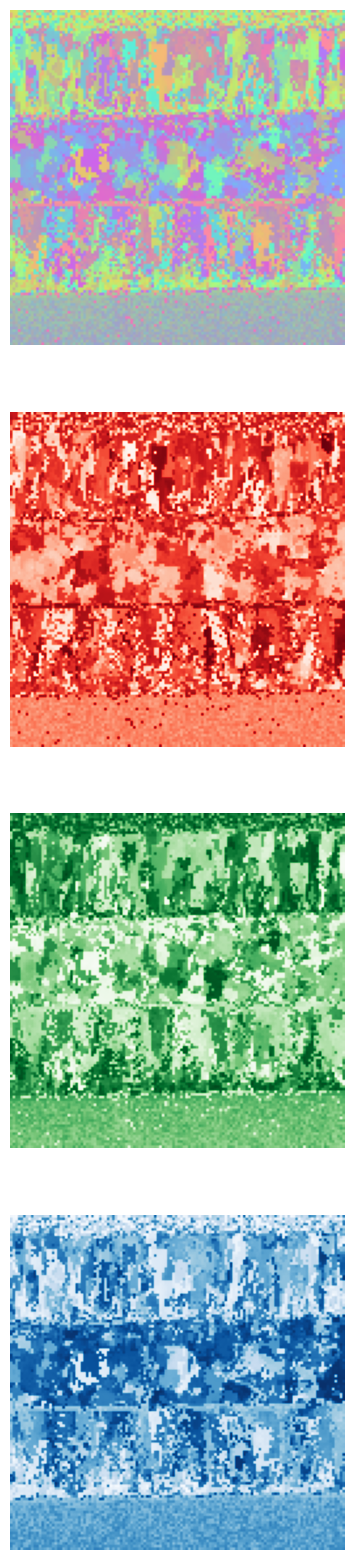

In [16]:
# select and quick-check the final DR space for cluster analysis
# sel_ind: choose one of the DR space created above
run_4DSTEM.prepare_clustering(sel_ind=1, quick_visual=True)

interactive(children=(FloatText(value=0.05, description='min. # of samples in a neighborhood', style=Descripti…

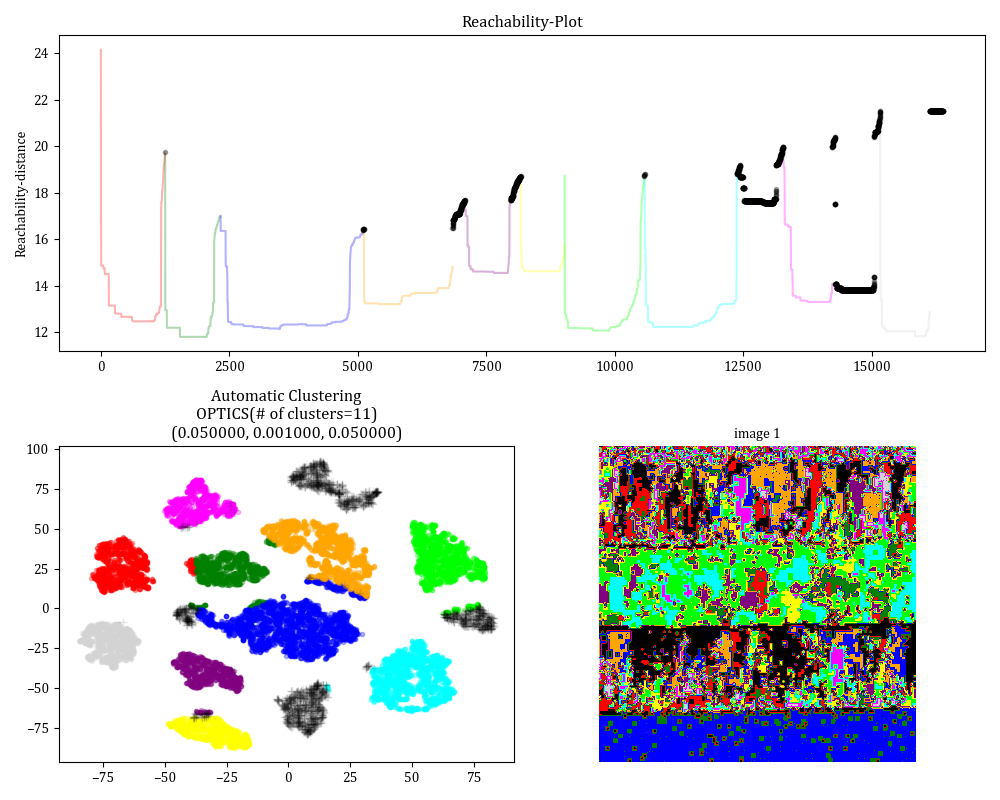

In [17]:
# clustering
%matplotlib widget
run_4DSTEM.cluster_analysis(method="optics")

In [18]:
%matplotlib inline

[-1  0  1  2  3  4  5  6  7  8  9]
[2542 1250 1077 2776 1726  890  855 1551 1798  955  964]


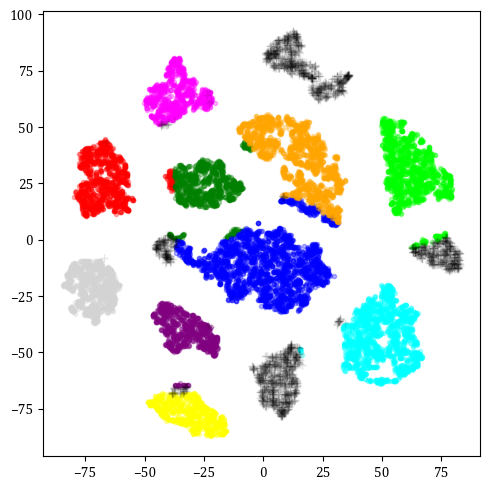

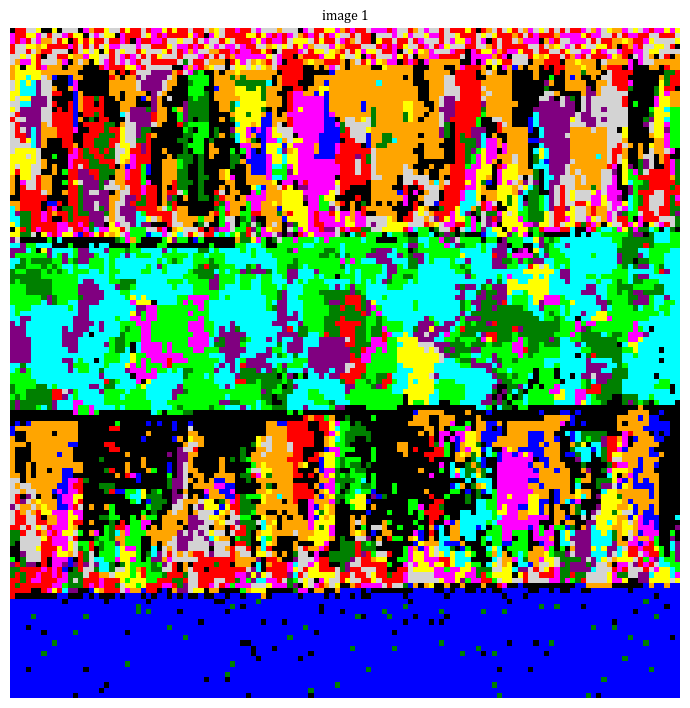

number of pixels in the label -1 cluster: 2542
number of pixels in the label 0 cluster: 1250
number of pixels in the label 1 cluster: 1077
number of pixels in the label 2 cluster: 2776
number of pixels in the label 3 cluster: 1726
number of pixels in the label 4 cluster: 890
number of pixels in the label 5 cluster: 855
number of pixels in the label 6 cluster: 1551
number of pixels in the label 7 cluster: 1798
number of pixels in the label 8 cluster: 955
number of pixels in the label 9 cluster: 964


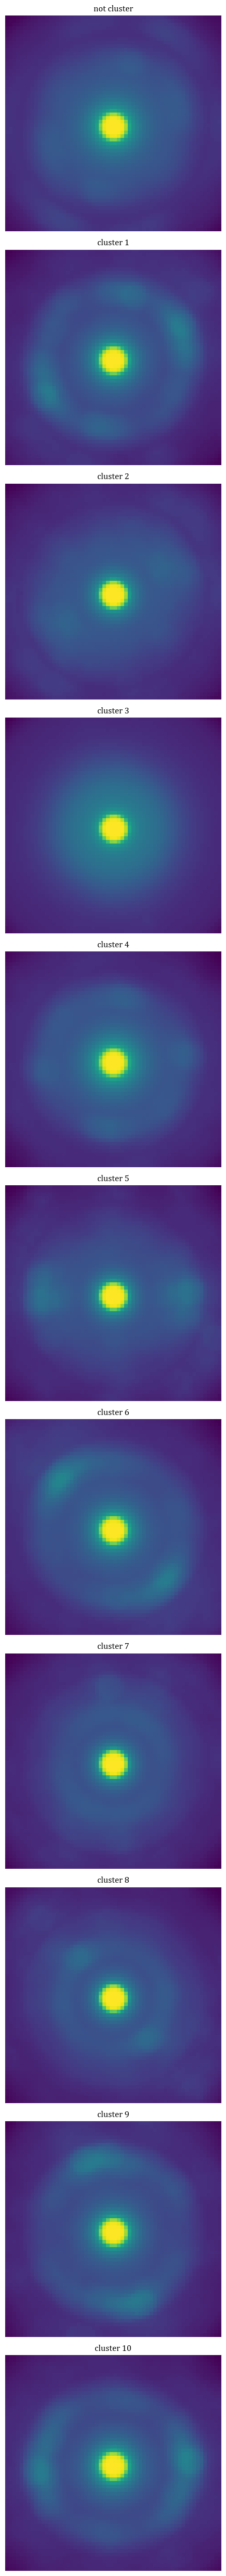

In [19]:
# clustering results (tf_map = True/False map for each cluster)
run_4DSTEM.clustering_result(tf_map=False, log_scale=False)